<a href="https://colab.research.google.com/github/leekate/2020ctrc/blob/master/error_20200814_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI_IMAGE_CLASSIFICATION**

4가지의 이미지 분류

기본적인 방법은 단일 이미지 분류와 같다. 대신, 다중 이미지 분류이기 때문에 카테고리의 변화가 있다.


## 1번 train

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### 파일 읽어오기

In [1]:
'''!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1'''

'!pip uninstall keras\n!pip install Keras==2.2.4\n\n!pip uninstall tensorflow\n!pip install tensorflow==1.13.1'

In [15]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img
import numpy as np

np.random.seed(3)

imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=[.2,.2],
                                    horizontal_flip=True)
                                    #validation_split=.2






In [16]:
#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation',
                                                  target_size=(64,64),
                                                  subset='validation')


Found 11909 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


### 데이터 부풀리기



*   rotation_range = 90: 
지정된 각도 범위내에서 임의로 원본이미지를 회전시킵니다. 단위는 도이며, 정수형입니다. 예를 들어 90이라면 0도에서 90도 사이에 임의의 각도로 회전시킵니다. 
*   width_shift_range = 0.1: 
지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동시킵니다. 수치는 전체 넓이의 비율(실수)로 나타냅니다. 예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 좌우 이동시킵니다

*   height_shift_range = 0.1: 
지정된 수직방향 이동 범위내에서 임의로 원본이미지를 이동시킵니다. 수치는 전체 높이의 비율(실수)로 나타냅니다. 예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 상하 이동시킵니다.
*   shear_range = 0.5:
밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냅니다. 예를 들어 0.5이라면, 0.5 라이안내외로 시계반대방향으로 변형시킵니다.

*   zoom_range = 0.3:
지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소합니다. “1-수치”부터 “1+수치”사이 범위로 확대/축소를 합니다. 예를 들어 0.3이라면, 0.7배에서 1.3배 크기 변화를 시킵니다.
*   horizontal_flip = True:
수평방향으로 뒤집기를 합니다.
*   vertical_flip = True:
수직방향으로 뒤집기를 합니다.






1. Cancer

In [12]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path1 = "/content/drive/My Drive/CTRC/validation/1. Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

file_list: ['can_124.jpg', 'can_131.jpg', 'can_123.jpg', 'can_122.jpg', 'can_121.jpg', 'can_111.jpg', 'can_112.jpg', 'can_113.jpg', 'can_114.jpg', 'can_115.jpg', 'can_117.jpg', 'can_12.jpg', 'can_120.jpg', 'can_119.jpg', 'can_116.jpg', 'can_110.jpg', 'can_11.jpg', 'can_109.jpg', 'can_118.jpg', 'can_108.jpg', 'can_104.jpg', 'can_103.jpg', 'can_107.jpg', 'can_105.jpg', 'can_106.jpg', 'can_101.jpg', 'can_100.jpg', 'can_102.jpg', 'can_10.jpg', 'can_1.jpg', 'can_212.jpg', 'can_181.jpg', 'can_205.jpg', 'can_206.jpg', 'can_204.jpg', 'can_203.jpg', 'can_195.jpg', 'can_196.jpg', 'can_194.jpg', 'can_202.jpg', 'can_201.jpg', 'can_193.jpg', 'can_200.jpg', 'can_20.jpg', 'can_178.jpg', 'can_2.jpg', 'can_192.jpg', 'can_191.jpg', 'can_199.jpg', 'can_197.jpg', 'can_198.jpg', 'can_190.jpg', 'can_19.jpg', 'can_188.jpg', 'can_189.jpg', 'can_182.jpg', 'can_177.jpg', 'can_187.jpg', 'can_180.jpg', 'can_186.jpg', 'can_185.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_179.jpg', 'can_184.jpg', 'can_174.jpg', 'can_18

In [13]:
n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

n=412
can_124.jpg


In [14]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
'''train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15,width_shift_range=0.1, height_shift_range=0.1,
                                  shear_range=0.5, zoom_range=[0.8, 2.0], horizontal_flip=True, vertical_flip=True, fill_mode='nearest')'''

#데이터가 충분하지 않아서
'''
testGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train', target_size=(64, 64))
'''


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/validation/1. Cancer/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, 
                                              save_to_dir='/content/drive/My Drive/CTRC/train/1. Cancer', 
                                              save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i > 5: 

            break




'''
  for batch in imageGenerator.flow(x, batch_size=1,
                              save_to_dir=saveDir,
                              save_format='jpg'):
        i += 1'''

Using TensorFlow backend.


Found 33 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


"\n  for batch in imageGenerator.flow(x, batch_size=1,\n                              save_to_dir=saveDir,\n                              save_format='jpg'):\n        i += 1"

2. Precancer


In [17]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path2 = "/content/drive/My Drive/CTRC/validation/2. Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_124.jpg', 'precan_126.jpg', 'precan_125.jpg', 'precan_130.jpg', 'precan_25.jpg', 'precan_121.jpg', 'precan_120.jpg', 'precan_119.jpg', 'precan_115.jpg', 'precan_116.jpg', 'precan_17.jpg', 'precan_118.jpg', 'precan_111.jpg', 'precan_112.jpg', 'precan_113.jpg', 'precan_114.jpg', 'precan_110.jpg', 'precan_117.jpg', 'precan_11.jpg', 'precan_109.jpg', 'precan_14.jpg', 'precan_107.jpg', 'precan_100.jpg', 'precan_101.jpg', 'precan_102.jpg', 'precan_104.jpg', 'precan_103.jpg', 'precan_106.jpg', 'precan_10.jpg', 'precan_105.jpg', 'precan_123.jpg', 'precan_122.jpg', 'precan_12.jpg', 'precan_108.jpg', 'precan_1.jpg', 'precan_37.jpg', 'precan_3.jpg', 'precan_31.jpg', 'precan_32.jpg', 'precan_33.jpg', 'precan_34.jpg', 'precan_36.jpg', 'precan_4.jpg', 'precan_35.jpg', 'precan_28.jpg', 'precan_29.jpg', 'precan_24.jpg', 'precan_27.jpg', 'precan_23.jpg', 'precan_39.jpg', 'precan_2.jpg', 'precan_20.jpg', 'precan_22.jpg', 'precan_18.jpg', 'precan_19.jpg', 'precan_21.jpg', 'precan_145.

In [18]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/2. Precancer',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation/2. Precancer',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/validation/2. Precancer/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/2. Precancer',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i >5: 

            break

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


3. Extra

In [21]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path3 = "/content/drive/My Drive/CTRC/validation/3. Extra"

file_list = os.listdir(path3)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['inf_117.jpg', 'inf_113.jpg', 'inf_114.jpg', 'inf_112.jpg', 'inf_116.jpg', 'inf_111.jpg', 'inf_111_1.jpg', 'inf_109.jpg', 'inf_108_1.jpg', 'inf_115.jpg', 'inf_108.jpg', 'inf_107.jpg', 'inf_106.jpg', 'inf_103.jpg', 'inf_104.jpg', 'inf_105.jpg', 'inf_102.jpg', 'inf_1.jpg', 'inf_100.jpg', 'inf_196.jpg', 'inf_203.jpg', 'inf_189.jpg', 'inf_190.jpg', 'inf_191.jpg', 'inf_195.jpg', 'inf_18.jpg', 'inf_19.jpg', 'inf_194.jpg', 'inf_188.jpg', 'inf_187.jpg', 'inf_186.jpg', 'inf_193.jpg', 'inf_192.jpg', 'inf_185.jpg', 'inf_184.jpg', 'inf_16.jpg', 'inf_177.jpg', 'inf_178.jpg', 'inf_179.jpg', 'inf_180.jpg', 'inf_183.jpg', 'inf_175.jpg', 'inf_182.jpg', 'inf_15.jpg', 'inf_181.jpg', 'inf_176.jpg', 'inf_174.jpg', 'inf_172.jpg', 'inf_173.jpg', 'inf_171.jpg', 'inf_168.jpg', 'inf_169.jpg', 'inf_167.jpg', 'inf_13_1.jpg', 'inf_170.jpg', 'inf_17.jpg', 'inf_164.jpg', 'inf_165.jpg', 'inf_166.jpg', 'inf_163.jpg', 'inf_162.jpg', 'inf_161.jpg', 'inf_13.jpg', 'inf_154.jpg', 'inf_156.jpg', 'inf_155.jpg', '

In [22]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/3. Extra',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation/3. Extra',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/validation/3. Extra/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/3. Extra',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i > 5: 

            break

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


4. Normal

In [24]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path4 = "/content/drive/My Drive/CTRC/validation/4. Normal"

file_list = os.listdir(path4)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['nor_101_1.jpg', 'nor_101.jpg', 'nor_100.jpg', 'nor_10.jpg', 'nor_129.jpg', 'nor_13.jpg', 'nor_128.jpg', 'nor_122.jpg', 'nor_123.jpg', 'nor_127.jpg', 'nor_126_1.jpg', 'nor_119.jpg', 'nor_120.jpg', 'nor_121.jpg', 'nor_12.jpg', 'nor_118_1.jpg', 'nor_126.jpg', 'nor_118.jpg', 'nor_125.jpg', 'nor_117.jpg', 'nor_112.jpg', 'nor_116.jpg', 'nor_111.jpg', 'nor_115.jpg', 'nor_11.jpg', 'nor_109.jpg', 'nor_114.jpg', 'nor_108.jpg', 'nor_107.jpg', 'nor_106.jpg', 'nor_105.jpg', 'nor_1.jpg', 'nor_104.jpg', 'nor_103.jpg', 'nor_189.jpg', 'nor_19.jpg', 'nor_190.jpg', 'nor_192.jpg', 'nor_184.jpg', 'nor_185.jpg', 'nor_186.jpg', 'nor_187.jpg', 'nor_183.jpg', 'nor_191.jpg', 'nor_124.jpg', 'nor_182.jpg', 'nor_181.jpg', 'nor_179.jpg', 'nor_113.jpg', 'nor_172.jpg', 'nor_173.jpg', 'nor_175.jpg', 'nor_177.jpg', 'nor_176.jpg', 'nor_174.jpg', 'nor_180.jpg', 'nor_18.jpg', 'nor_171.jpg', 'nor_110.jpg', 'nor_170.jpg', 'nor_167.jpg', 'nor_17.jpg', 'nor_162.jpg', 'nor_163.jpg', 'nor_164.jpg', 'nor_165.jpg', '

In [25]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/4. Normal',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation/4. Normal',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/validation/4. Normal/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/4. Normal',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i > 5: 

            break

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [26]:
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)


## 폴더 내 이미지 개수 확인하기

In [27]:
#코드 추가해서 확인하기

import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/4. Normal"))
file_count = len(files)

file_count

6917

In [28]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/3. Extra"))
file_count = len(files)

file_count

1589

In [29]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/2. Precancer"))
file_count = len(files)

file_count

899

In [30]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/1. Cancer"))
file_count = len(files)

file_count

2504

## CNN 모델 만들기 (Conv2D 이용)

In [12]:
#import keras.backend.tensorflow_backend as K
import tensorflow.keras.backend as K
import os, glob, numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

#with device('/device:GPU:0'):
model = Sequential()
model.add(Conv2D(32, (7,7), padding="same", input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    # 3X3 크기의 컨볼루션 레이어를 32개의 필터수를 처음에 생성
    # 활성화 함수 relu
    # (64,64,3)의 튜플 값 가진다
    # Maxpooling2D를 통해 중요 값만 뽑아 작은 출력값 만든다

    
model.add(Conv2D(64, (5,5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 
    #CNN에서 컨볼루션 레이어나 맥스풀링을 거치면 주요 특징만 추출되어 학습됨
    
    #컨볼루션이나 맥스풀링은 주로 2차원을 다루지만
    #전결합층에 전달을 하기 위해서는 1차원으로 바꿔야하는데
    #이 때 Flatten사용
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

    #model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [39]:
'''!pip uninstall keras
!pip install keras --upgrade'''

Uninstalling Keras-2.2.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.4


In [2]:
'''

!pip uninstall tensorflow
!pip install tensorflow==2.2'''

Uninstalling tensorflow-1.13.1:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.13.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.13.1
     |████████████████████████████████| 516.2MB 33kB/s 
     |████████████████████████████████| 3.0MB 67kB/s 
     |████████████████████████████████| 460kB 54.3MB/s 
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

**model.fit_generator**

- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정합니다.

- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 보통 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정합니다.

- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 100번을 반복적으로 학습시켜 보겠습니다.

- validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 본 예제에서는 앞서 생성한 validation_generator으로 지정합니다.

- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정합니다.

In [18]:

#steps_per_epoch는 한 세대마다 몇 번 생성기로부터 데이터를 얻을지를 나타내는 값입니다.

hist=model.fit_generator(trainGen,steps_per_epoch=40, epochs=100, 
               validation_data=validationGen) 
               #validation_steps=5

            

Epoch 1/100


ValueError: ignored

## !!ERROR SOLUTION!!

## 성능 그래프

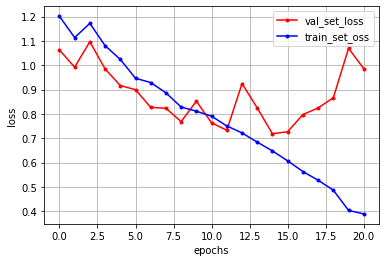

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig,loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')

loss_ax.plot(hist.history['val_loss'],'r',label='val_loss')


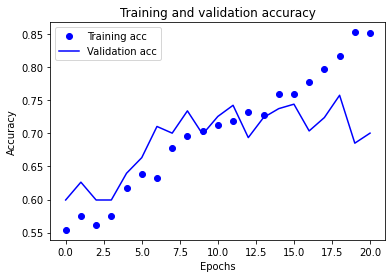

In [ ]:
acc_ax.plot(hist.history['accuracy'],'b',label='train accuracy')

acc_ax.plot(hist.history['val_accuracy'],'g',label='val accuracy')

​

loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')

acc_ax.legend(loc='lower left')

plt.show()

## 2번 모델 평가하기

In [ ]:
print("--Evaluate--")

scores=model.evaluate_generator(validationGen,steps=5)

print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))

​

#모델구조와 모델의 가중치를 저장해줍니다.

from keras.models import load_model

model.save('project.h5')

## 3. 모델을 이용해 새로운 이미지를 분류해보자

[3]
예측: 4. Normal
Label:[0 0 0 1]


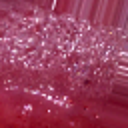

In [ ]:
#저장된 모델구조와 모델 가중치를 불러옵니다.

from keras.models import load_model

model=load_model('project.h5')

​

'''#새로운 이미지를 넣고 분류를 잘하는지 봅니다.

validationGen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory('/Users/KSJ/Desktop/yellow/test',
                                                target_size=(64,64),
                                                =4,
                                                class_modebatch_size='categorical')
'''

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/validation',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')



print("--Predict--")

output=model.predict_generator(validationGen,steps=5)

np.set_printoptions(formatter={'float':lambda x:"{0:0.3f}".format(x)})

print(validationGen.class_indices)

print(output)

## 3번 혼동 행렬

In [ ]:
# 예측

predicted_classes = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize = (14, 10))

sns.heatmap(cm, annot = True)